In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

cluster          0   1   2   3   4   5   6   7   8   9
city                                                  
Anchorage        0   4   0  11  23  17   0   1   0   0
Atlanta          0   0   2   0   0   0   0   0  45   0
Atlantic City    6   0   0   0   0   0   0   0  39   0
Calgary          4   1   0   0   0  10  37   0   0   0
Chicago          2   1   0   0   0   0  47   0   2   0
Denver           0   0   0   0   0   0   0   0   9   0
Edmonton         0  18   0   2   3  24   4   0   0   0
Gander           0  11   0  12  12   4   4   8   0   0
Halifax          0  10   0   0   0   1  39   0   0   0
London           0   1   0   0   0   2  39   0   0   0
Los Angeles      0   0   0   0   0   0   0   0   0  39
Miami            0   0  43   0   0   0   0   0   0   0
Montreal         0  15   0   7   3   2   1   0   0   0
New Orleans      0   0  45   0   0   0   0   0   0   0
Ottawa           0  17   0   6   3  15   8   2   0   0
Portland        31   0   0   0   0   0   0   0   7   0
Québec    

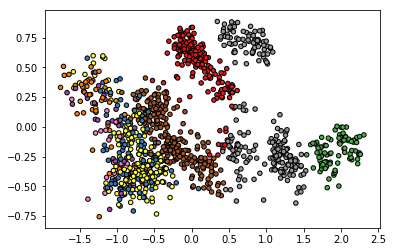

In [12]:
def get_pca(X):
    """
    Transform data to 2D points for plotting. Should return an array with shape (n, 2).
    """
    flatten_model = make_pipeline(
        # TODO
        MinMaxScaler(),
        PCA(2)
    )
    X2 = flatten_model.fit_transform(X)
    assert X2.shape == (X.shape[0], 2)
    return X2


def get_clusters(X):
    """
    Find clusters of the weather data.
    """
    model = make_pipeline(
        # TODO
        KMeans(n_clusters=10)
    )
    model.fit(X)
    return model.predict(X)


def main():
    data = pd.read_csv(sys.argv[1] if len(sys.argv) == 2 else 'monthly-data-labelled.csv')

    X = data.drop(['city', 'year'], axis=1)
    y = data.city
    
    X2 = get_pca(X)
    clusters = get_clusters(X)
    plt.scatter(X2[:, 0], X2[:, 1], c=clusters, cmap='Set1', edgecolor='k', s=20)
    plt.savefig('clusters.png')

    df = pd.DataFrame({
        'cluster': clusters,
        'city': y,
    })
    counts = pd.crosstab(df['city'], df['cluster'])
    print(counts)


if __name__ == '__main__':
    main()